# 1/10 -  Basic plotting

In [1]:
import matplotlib.pyplot as plt
# %matplotlib widget - for interactive window, restart kernel if need to use this

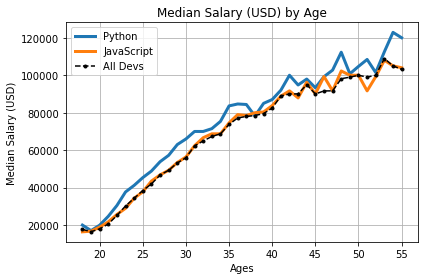

In [6]:
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
# Median Python Developer Salaries by Age
py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
# Median JavaScript Developer Salaries by Age
js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
# Median Developer Salaries by Age
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

# plt.style.available - show all built-in styles
# plt.style.use('ggplot')

# plt.xkcd()

# line plot by default - use plt.bar, can use both line and bar in same plot
plt.plot(ages_x, py_dev_y, linewidth=3, label='Python') 
plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')
plt.plot(ages_x, dev_y, color='k', linestyle='--', marker='.', label='All Devs') 
# or plt.plot(x, y, 'k--.', label)
# can use 'black'/'#000'/'#000000' for color too
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend() # or plt.legend(['Python', 'JavaScript']) - overrides any labels
plt.grid(True)
plt.tight_layout() # for better padding
# plt.savefig('plot.png')
plt.show()

# 2/10 - Bar charts, CSV

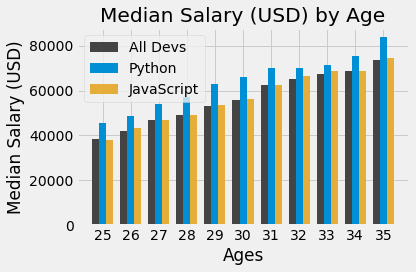

In [11]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(x_indexes-width, dev_y, width=width, color="#444444", label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes, py_dev_y, width=width, color="#008fd5", label="Python")

js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.bar(x_indexes+width, js_dev_y, width=width, color="#e5ae38", label="JavaScript")

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.legend()
plt.tight_layout()
plt.show()

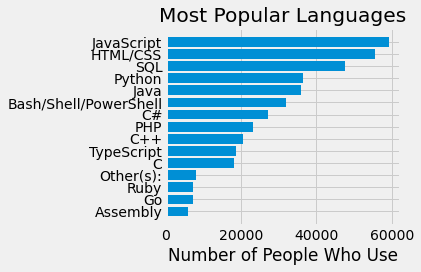

In [30]:
import csv
import pandas as pd
from collections import Counter

plt.style.use("fivethirtyeight")

language_counter = Counter()
use_pandas = False

if use_pandas is True:
    data = pd.read_csv('data.csv')
    ids = data['Responder_id']
    lang_responses = data['LanguagesWorkedWith']

    for response in lang_responses:
        language_counter.update(response.split(';'))
else:
    with open('data.csv') as csv_file: # context manager
        csv_reader = csv.DictReader(csv_file) # can access values by key instead of index
        # row = next(csv_reader) # get first row (keys are headers)
        # print(row, row['LanguagesWorkedWith'], row['LanguagesWorkedWith'].split(';'))

        for row in csv_reader:
            language_counter.update(row['LanguagesWorkedWith'].split(';'))

# print(language_counter)
# print(language_counter.most_common(5)) # 5 most common responses

# can do this one line using zip
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.show()

In [20]:
c = Counter(['a', 'b'])
c.update(['c', 'a'])
c.update(['a','d','a','c'])
c

Counter({'a': 4, 'b': 1, 'c': 2, 'd': 1})

# 3/10 - Pie charts (proportion at a single point instant)

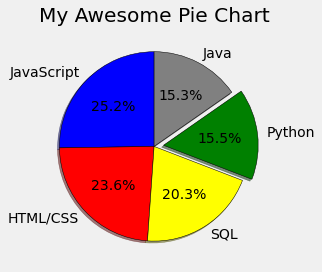

In [44]:
# use for comparing small number of items (~5), not as many as in snippets.txt (use bar chart instead)

from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
# plt styles can automatically select colours, or you can specify hex values too
colors = ['blue', 'red', 'yellow', 'green', 'grey'] 
# for emphasising one slice - 0.1 = point of slice is 10% of radius further out
explode = [0, 0, 0, 0.1, 0] 

plt.pie(slices, 
labels=labels, 
colors=colors, 
explode=explode, 
shadow=True, # add shadow
startangle=90, # change rotation (good for making an edge vertical)
autopct='%1.1f%%', # add percentages in slices
wedgeprops={'edgecolor': 'black'} # for edges between slices
)
plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

# 4/10 - Stack plots / Area charts (proportions over a series of points)

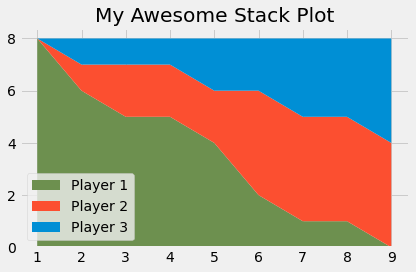

In [57]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ["Player 1", "Player 2", "Player 3"]
colors = ['#6d904f', '#fc4f30', '#008fd5']

# player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
# player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
# player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

# data which has a constant total e.g. dev1 handing off project to dev2 and dev3 and tracking hours spent on project by each person
player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

# # breakdown of points scored in first minute of the game
# plt.pie([player1[0], player2[0], player3[0]], labels=labels)

# can also input multi-dimensional arrays instead of 1xN lists
plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.title("My Awesome Stack Plot")
plt.tight_layout()
# change location to upper/lower left, can also input coordinates (origin at bottom left) 
# e.g. plt.legend(loc=(0.07, 0.05)) - put legend 7% and 5% from bottom corner
plt.legend(loc='lower left') 
plt.show()

# 5/10 - Filling line plots

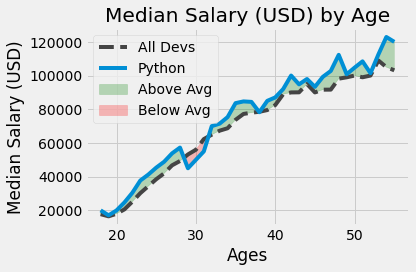

In [70]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('dev_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

# fill area under line plot
plt.fill_between(ages, 
py_salaries, dev_salaries, # fill between these two
where=(py_salaries > dev_salaries),
interpolate=True, # to make sure everything's filled correctly
color='green',
alpha=0.25, # opacity
label='Above Avg'
)

plt.fill_between(ages, 
py_salaries, dev_salaries,
where=(py_salaries <= dev_salaries),
interpolate=True, 
color='red', 
alpha=0.25, 
label='Below Avg'
)

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.legend()
plt.show()

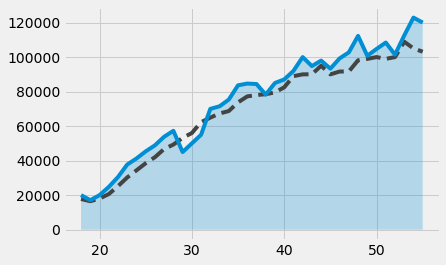

In [66]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, alpha=0.25, label='Above Avg')

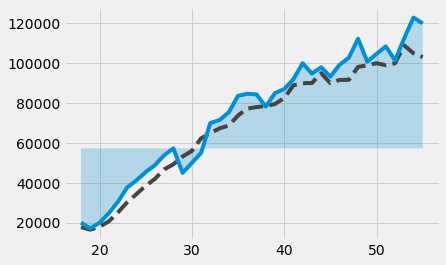

In [67]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287
plt.fill_between(ages, py_salaries, overall_median, alpha=0.25, label='Above Avg')

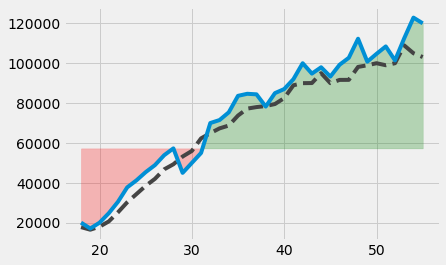

In [73]:
plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, 
py_salaries, overall_median, 
where=(py_salaries > overall_median),
interpolate=True,
color='green',
alpha=0.25,
)

plt.fill_between(ages, 
py_salaries, overall_median, 
where=(py_salaries <= overall_median),
interpolate=True,
color='red',
alpha=0.25,
)